# Please note that Isles of Scilly is now deleted as outliers.

In [178]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Preperation

In [179]:
conditionx = pd.read_csv('CW1_correlation_outliers.csv')

In [180]:
conditionx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   2008_2013_ratio   150 non-null    float64
 1   2013_2018_ratio   150 non-null    float64
 2   2008_2018_ratio   150 non-null    float64
 3   total_budget      150 non-null    int64  
 4   clean_air         150 non-null    int64  
 5   clean_environ     150 non-null    int64  
 6   health_training   150 non-null    int64  
 7   school_awareness  150 non-null    int64  
 8   media_awareness   150 non-null    int64  
 9   sub_counselling   150 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 11.8 KB


In [181]:
conditionx.head()

,2008_2013_ratio,2013_2018_ratio,2008_2018_ratio,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,0.0068,0.2140,0.2223,139000,21000,22000,18000,41000,18000,19000
1,0.0904,0.2579,0.3716,220000,50000,17000,23000,74000,30000,26000
2,0.1642,0.1057,0.2872,160000,41000,45000,5000,26000,29000,14000
3,-0.0466,0.0720,0.0221,161000,33000,42000,19000,50000,10000,7000
4,0.0092,0.0851,0.0951,130000,37000,52000,17000,8000,3000,13000


# Check the correlation between variables

Text(0.5, 1.0, 'Correlation Matrix')

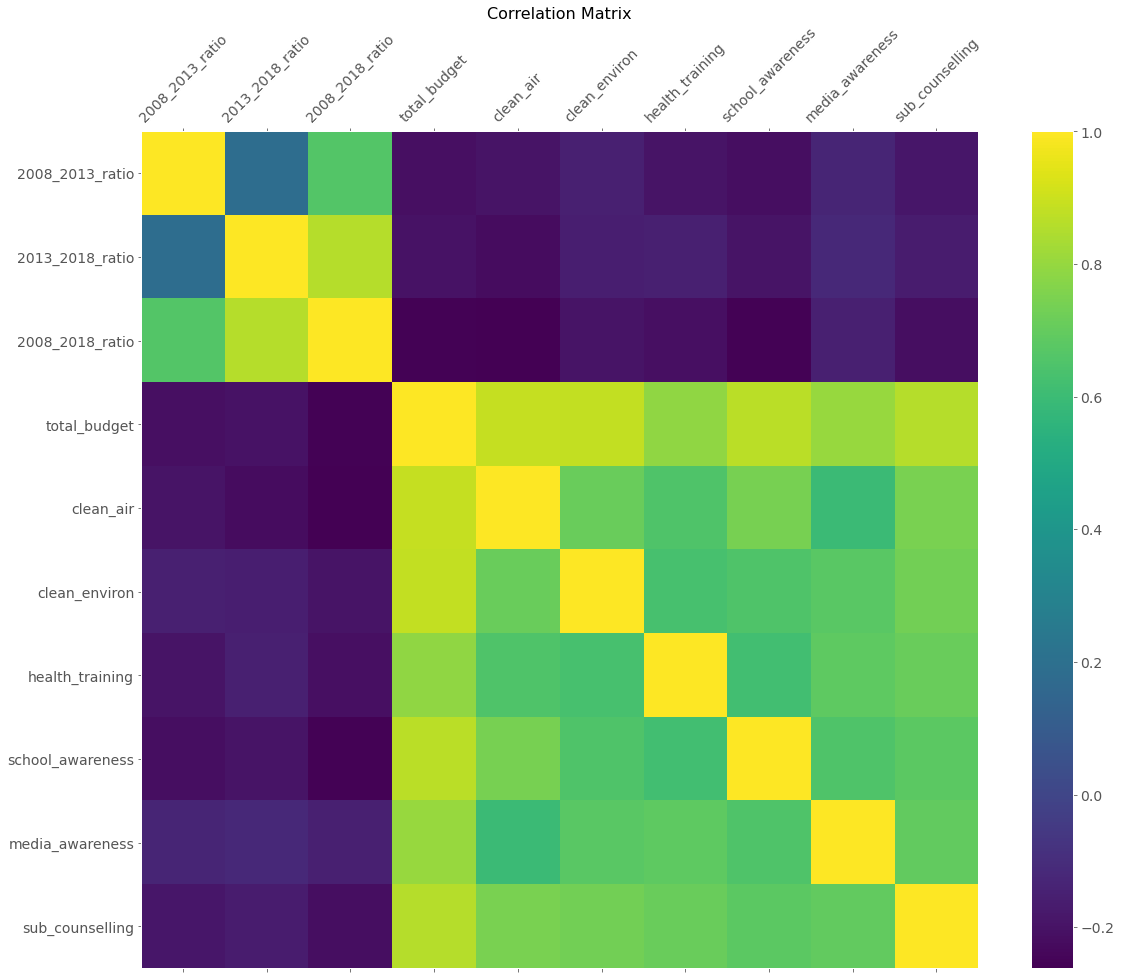

In [182]:
df = conditionx
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [183]:
df.corr()

,2008_2013_ratio,2013_2018_ratio,2008_2018_ratio,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
2008_2013_ratio,1.0000,0.1883,0.6624,-0.2093,-0.1948,-0.1530,-0.1934,-0.2162,-0.1318,-0.1852
2013_2018_ratio,0.1883,1.0000,0.8593,-0.2013,-0.2187,-0.1540,-0.1506,-0.1951,-0.1145,-0.1658
2008_2018_ratio,0.6624,0.8593,1.0000,-0.2563,-0.2618,-0.1933,-0.2107,-0.2543,-0.1525,-0.2172
total_budget,-0.2093,-0.2013,-0.2563,1.0000,0.8887,0.8837,0.7905,0.8695,0.8078,0.8589
clean_air,-0.1948,-0.2187,-0.2618,0.8887,1.0000,0.7124,0.6533,0.7399,0.5973,0.7482
clean_environ,-0.1530,-0.1540,-0.1933,0.8837,0.7124,1.0000,0.6336,0.6507,0.6753,0.7312
health_training,-0.1934,-0.1506,-0.2107,0.7905,0.6533,0.6336,1.0000,0.6159,0.6854,0.7115
school_awareness,-0.2162,-0.1951,-0.2543,0.8695,0.7399,0.6507,0.6159,1.0000,0.6537,0.6821
media_awareness,-0.1318,-0.1145,-0.1525,0.8078,0.5973,0.6753,0.6854,0.6537,1.0000,0.6991
sub_counselling,-0.1852,-0.1658,-0.2172,0.8589,0.7482,0.7312,0.7115,0.6821,0.6991,1.0000


# Linear Regression

In [149]:
data_filename = 'CW1_outliers.csv'
output_filename = '0813_regression_outliers.png'

In [150]:
figure_width, figure_height = 7,7

import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

## 2008-2013

In [151]:
x_values = data[1:,4]
y_values = data[1:,1]

In [152]:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()

print(regression_model_b.summary())
print()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.781
Date:                Sun, 14 Nov 2021   Prob (F-statistic):             0.0102
Time:                        16:26:03   Log-Likelihood:                 227.73
No. Observations:                 150   AIC:                            -451.5
Df Residuals:                     148   BIC:                            -445.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0635      0.007      8.852      0.0

In [153]:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

In [154]:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = -5.423659240903658e-08
intercept = 0.0634974472527494
Rsquared  = 0.0438104563688656
MSE       = 0.0028486531350108897
pvalue    = 0.010152210377098635


In [155]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

In [156]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

(0.0, 5000000.0)

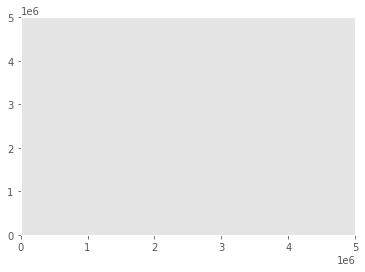

In [157]:
x_min,x_max = 0,5000000
y_min,y_max = 0,5000000
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

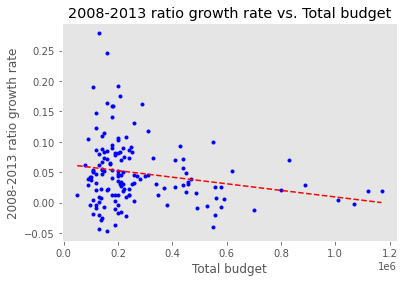

In [158]:
output_filename = '0813_regression_outliers.png'
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')

plt.xlabel('Total budget')
plt.ylabel('2008-2013 ratio growth rate')
plt.title('2008-2013 ratio growth rate vs. Total budget')

plt.savefig(output_filename)

### Residual Analysis

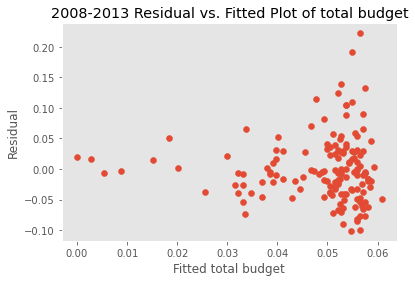

In [159]:
# plot 
plt.scatter(regression_model_b.fittedvalues, regression_model_b.resid)
# adding title and labels
plt.xlabel('Fitted total budget')
plt.ylabel('Residual')
plt.title('2008-2013 Residual vs. Fitted Plot of total budget')
plt.show()

## 2013-2018

In [160]:
x_values = data[1:,4]
y2_values = data[1:,2]

In [161]:
X_values = sms.add_constant(x_values)
regression_model_a2 = sms.OLS(y2_values, X_values)
regression_model_b2 = regression_model_a2.fit()

print(regression_model_b2.summary())
print() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.250
Date:                Sun, 14 Nov 2021   Prob (F-statistic):             0.0135
Time:                        16:26:27   Log-Likelihood:                 163.23
No. Observations:                 150   AIC:                            -322.5
Df Residuals:                     148   BIC:                            -316.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1092      0.011      9.906      0.0

In [162]:
gradient2  = regression_model_b2.params[1]
intercept2 = regression_model_b2.params[0]
Rsquared2  = regression_model_b2.rsquared
MSE2       = regression_model_b2.mse_resid
pvalue2    = regression_model_b2.f_pvalue

In [163]:
print("gradient  =", regression_model_b2.params[1])
print("intercept =", regression_model_b2.params[0])
print("Rsquared  =", regression_model_b2.rsquared)
print("MSE       =", regression_model_b2.mse_resid)
print("pvalue    =", regression_model_b2.f_pvalue)

gradient  = -8.004727212538733e-08
intercept = 0.10923589211595434
Rsquared  = 0.04051705032952302
MSE       = 0.006732573138123723
pvalue    = 0.013511958571325639


In [164]:
x_lobf2 = [min(x_values),max(x_values)]
y_lobf2 = [x_lobf2[0]*gradient2 + intercept2,x_lobf2[1]*gradient2 + intercept2]

In [165]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

(0.0, 5000000.0)

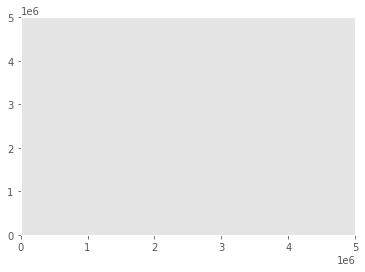

In [166]:
x_min,x_max = 0,5000000
y_min,y_max = 0,5000000
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

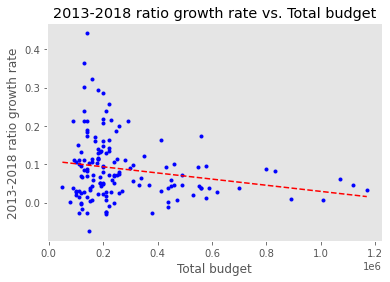

In [167]:
output_filename2 = 'regression_1318_outliers.png'
plt.plot(x_values,y2_values,'b.',x_lobf2,y_lobf2,'r--')

plt.xlabel('Total budget')
plt.ylabel('2013-2018 ratio growth rate')
plt.title('2013-2018 ratio growth rate vs. Total budget')

plt.savefig(output_filename2)

### Residual Analysis

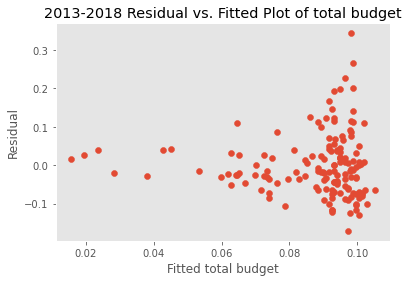

In [168]:
# plot 
plt.scatter(regression_model_b2.fittedvalues, regression_model_b2.resid)
# adding title and labels
plt.xlabel('Fitted total budget')
plt.ylabel('Residual')
plt.title('2013-2018 Residual vs. Fitted Plot of total budget')
plt.show()

## 2008-2018

In [169]:
x_values = data[1:,4]
y3_values = data[1:,3]

In [170]:
X_values = sms.add_constant(x_values)
regression_model_a3 = sms.OLS(y3_values, X_values)
regression_model_b3 = regression_model_a2.fit()

print(regression_model_b3.summary())
print() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.250
Date:                Sun, 14 Nov 2021   Prob (F-statistic):             0.0135
Time:                        16:26:57   Log-Likelihood:                 163.23
No. Observations:                 150   AIC:                            -322.5
Df Residuals:                     148   BIC:                            -316.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1092      0.011      9.906      0.0

In [171]:
gradient3  = regression_model_b3.params[1]
intercept3 = regression_model_b3.params[0]
Rsquared3  = regression_model_b3.rsquared
MSE3       = regression_model_b3.mse_resid
pvalue3    = regression_model_b3.f_pvalue

In [172]:
print("gradient  =", regression_model_b3.params[1])
print("intercept =", regression_model_b3.params[0])
print("Rsquared  =", regression_model_b3.rsquared)
print("MSE       =", regression_model_b3.mse_resid)
print("pvalue    =", regression_model_b3.f_pvalue)

gradient  = -8.004727212538733e-08
intercept = 0.10923589211595434
Rsquared  = 0.04051705032952302
MSE       = 0.006732573138123723
pvalue    = 0.013511958571325639


In [173]:
x_lobf3 = [min(x_values),max(x_values)]
y_lobf3 = [x_lobf3[0]*gradient3 + intercept3,x_lobf3[1]*gradient3 + intercept3]

In [174]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

(0.0, 5000000.0)

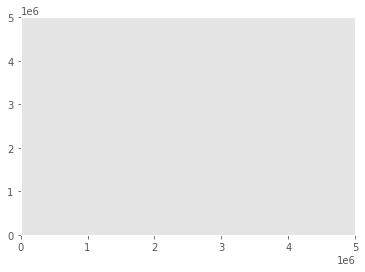

In [175]:
x_min,x_max = 0,5000000
y_min,y_max = 0,5000000
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

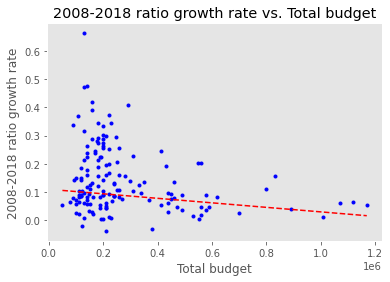

In [185]:
output_filename3 = 'regression_0818_outliers.png'
plt.plot(x_values,y3_values,'b.',x_lobf3,y_lobf3,'r--')

plt.xlabel('Total budget')
plt.ylabel('2008-2018 ratio growth rate')
plt.title('2008-2018 ratio growth rate vs. Total budget')

plt.savefig(output_filename3)

### Residual Analysis

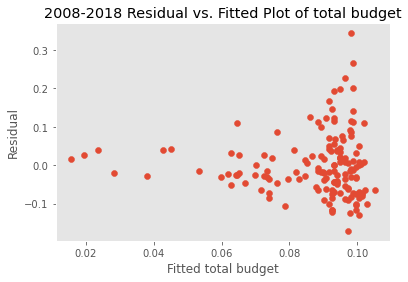

In [177]:
# plot 
plt.scatter(regression_model_b3.fittedvalues, regression_model_b3.resid)
# adding title and labels
plt.xlabel('Fitted total budget')
plt.ylabel('Residual')
plt.title('2008-2018 Residual vs. Fitted Plot of total budget')
plt.show()